# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&format=json&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]-273.15
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]
        
     
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | puerto asis
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | bel ombre
Processing Record 6 of Set 1 | yuci
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | manakara
Processing Record 9 of Set 1 | afaahiti
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | abalak
Processing Record 12 of Set 1 | lae
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | mount gambier
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | betio village
Processing Record 18 of Set 1 | sandviken
Processing Record 19 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | sandpoint
Processing Record 22 of Set 1 | kegen
Process

Processing Record 39 of Set 4 | mingshui
Processing Record 40 of Set 4 | hithadhoo
Processing Record 41 of Set 4 | vysokiy
Processing Record 42 of Set 4 | hihifo
City not found. Skipping...
Processing Record 43 of Set 4 | vila velha
Processing Record 44 of Set 4 | holualoa
Processing Record 45 of Set 4 | kununurra
Processing Record 46 of Set 4 | ponta delgada
Processing Record 47 of Set 4 | lorengau
Processing Record 48 of Set 4 | the pas
Processing Record 49 of Set 4 | minas de marcona
Processing Record 0 of Set 5 | crane
Processing Record 1 of Set 5 | ta`u
Processing Record 2 of Set 5 | new martinsville
Processing Record 3 of Set 5 | valparaiso
Processing Record 4 of Set 5 | port douglas
Processing Record 5 of Set 5 | hilo
Processing Record 6 of Set 5 | dakhla
Processing Record 7 of Set 5 | nishinoomote
Processing Record 8 of Set 5 | melfi
Processing Record 9 of Set 5 | san antonio de pale
Processing Record 10 of Set 5 | nova olinda do norte
Processing Record 11 of Set 5 | bayan nur


Processing Record 27 of Set 8 | port augusta
Processing Record 28 of Set 8 | coquimbo
Processing Record 29 of Set 8 | spasskoye
Processing Record 30 of Set 8 | ostrovskoye
Processing Record 31 of Set 8 | red deer
Processing Record 32 of Set 8 | moanda
Processing Record 33 of Set 8 | wynyard
Processing Record 34 of Set 8 | ijuw
City not found. Skipping...
Processing Record 35 of Set 8 | nguigmi
Processing Record 36 of Set 8 | ranchettes
Processing Record 37 of Set 8 | fort st. john
Processing Record 38 of Set 8 | preobrazheniye
Processing Record 39 of Set 8 | nova sintra
Processing Record 40 of Set 8 | puerto san carlos
City not found. Skipping...
Processing Record 41 of Set 8 | vazante
Processing Record 42 of Set 8 | aginskoye
Processing Record 43 of Set 8 | dali
Processing Record 44 of Set 8 | dalhart
Processing Record 45 of Set 8 | cuito
Processing Record 46 of Set 8 | okhotsk
Processing Record 47 of Set 8 | lubango
Processing Record 48 of Set 8 | nadi
Processing Record 49 of Set 8 |

Processing Record 16 of Set 12 | sinop
Processing Record 17 of Set 12 | miri
Processing Record 18 of Set 12 | fairmont
Processing Record 19 of Set 12 | hoemul-li
Processing Record 20 of Set 12 | jieshi
Processing Record 21 of Set 12 | santanyi
Processing Record 22 of Set 12 | chibuto
Processing Record 23 of Set 12 | kismayo
Processing Record 24 of Set 12 | ouarzazat
Processing Record 25 of Set 12 | mankato
Processing Record 26 of Set 12 | carbondale
Processing Record 27 of Set 12 | alassio
Processing Record 28 of Set 12 | cabedelo
Processing Record 29 of Set 12 | san luis de la loma
Processing Record 30 of Set 12 | kayangel
Processing Record 31 of Set 12 | bardai
Processing Record 32 of Set 12 | ceeldheer
Processing Record 33 of Set 12 | north platte
Processing Record 34 of Set 12 | natal
Processing Record 35 of Set 12 | dickinson
Processing Record 36 of Set 12 | altai
Processing Record 37 of Set 12 | sisimiut
Processing Record 38 of Set 12 | turtas
-----------------------------
Data R

In [3]:
test1 = f'https://api.openweathermap.org/data/2.5/weather?&q=hami&format=json&appid={weather_api_key}'
response = requests.get(test1)
response = response.json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 42.8,
        "lon": 93.45
    },
    "dt": 1688791808,
    "id": 1529484,
    "main": {
        "feels_like": 307.44,
        "grnd_level": 922,
        "humidity": 13,
        "pressure": 999,
        "sea_level": 999,
        "temp": 310.04,
        "temp_max": 310.04,
        "temp_min": 310.04
    },
    "name": "Kumul",
    "sys": {
        "country": "CN",
        "sunrise": 1688768114,
        "sunset": 1688822802
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 253,
        "gust": 2.06,
        "speed": 1.67
    }
}


In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,21.08,62,63,3.00,PN,1689158301
1,puerto asis,0.5133,-76.5007,20.04,99,59,0.28,CO,1689158302
2,bilibino,68.0546,166.4372,14.96,59,51,0.69,RU,1689158303
3,port mathurin,-19.6833,63.4167,23.64,76,3,4.14,MU,1689158304
4,bel ombre,-4.6167,55.4167,27.91,74,20,6.17,SC,1689158305


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.08,62,63,3.00,PN,1689158301
1,puerto asis,0.5133,-76.5007,20.04,99,59,0.28,CO,1689158302
2,bilibino,68.0546,166.4372,14.96,59,51,0.69,RU,1689158303
3,port mathurin,-19.6833,63.4167,23.64,76,3,4.14,MU,1689158304
4,bel ombre,-4.6167,55.4167,27.91,74,20,6.17,SC,1689158305


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

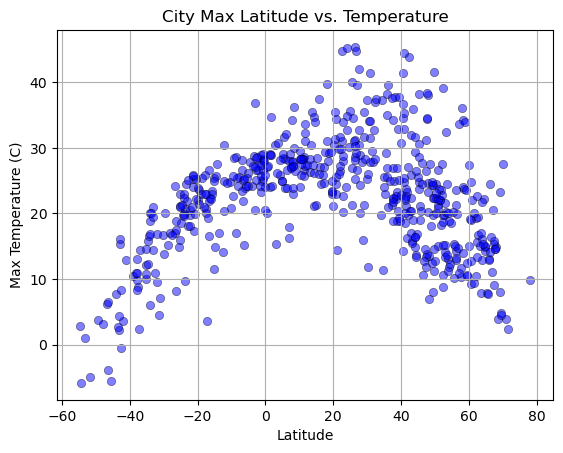

In [8]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], facecolors="blue",
            alpha=0.5,edgecolors='black', linewidths=0.5)


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

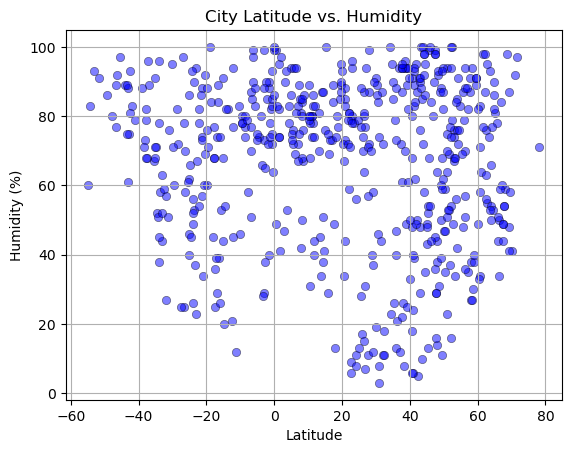

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], facecolors="blue",
            alpha=0.5,edgecolors='black', linewidths=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

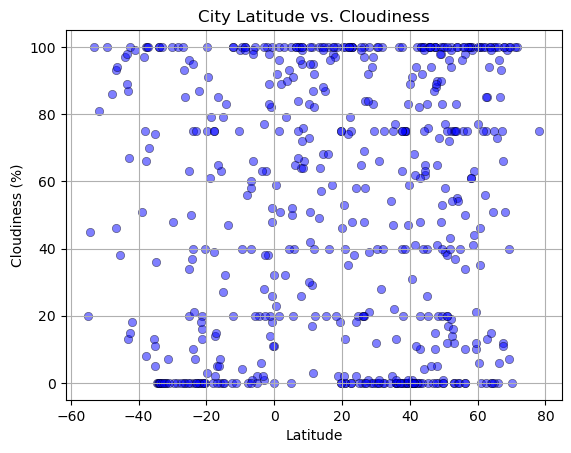

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], facecolors="blue",
            alpha=0.5,edgecolors='black', linewidths=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

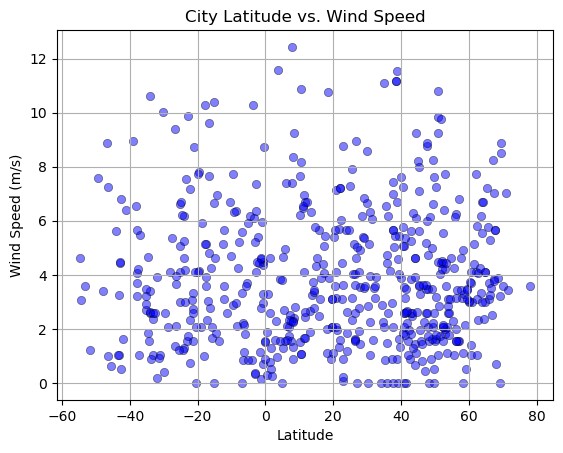

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], facecolors="blue",
            alpha=0.5,edgecolors='black', linewidths=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_value,y_value,):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [ ]:
(slope_temp, intercept_temp, rvalue_temp, pvalue_temp, stderr_temp) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_values_temp = northern_hemi_df['Lat'] * slope_temp + intercept_temp
line_eq_temp = "y = " + str(round(slope_temp,2)) + "x + " + str(round(intercept_temp,2))

(slope_cloud, intercept_cloud, rvalue_cloud, pvalue_cloud, stderr_cloud) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regress_values_cloud = northern_hemi_df['Lat'] * slope_cloud + intercept_cloud
line_eq_cloud = "y = " + str(round(slope_cloud,2)) + "x + " + str(round(intercept_cloud,2))

(slope_humid, intercept_humid, rvalue_humid, pvalue_humid, stderr_humid) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regress_values_humid = northern_hemi_df['Lat'] * slope_humid + intercept_humid
line_eq_humid = "y = " + str(round(slope_humid,2)) + "x + " + str(round(intercept_humid,2))

(slope_wind, intercept_wind, rvalue_wind, pvalue_wind, stderr_wind) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regress_values_wind = southern_hemi_df['Lat'] * slope_wind + intercept_wind
line_eq_wind = "y = " + str(round(slope_wind,2)) + "x + " + str(round(intercept_wind,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df.loc[city_data_df['Lat'] >= 0]
northern_hemi_df = pd.DataFrame (northern_hemi)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto asis,0.5133,-76.5007,20.04,99,59,0.28,CO,1689158302
2,bilibino,68.0546,166.4372,14.96,59,51,0.69,RU,1689158303
5,yuci,37.6803,112.7319,26.86,61,40,7.00,CN,1689158306
10,abalak,58.1286,68.5944,36.13,27,61,3.14,RU,1689158311
12,bethel,41.3712,-73.4140,21.17,89,0,0.00,US,1689158313


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi = city_data_df.loc[city_data_df['Lat'] < 0]
southern_hemi_df = pd.DataFrame (southern_hemi)
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.08,62,63,3.00,PN,1689158301
3,port mathurin,-19.6833,63.4167,23.64,76,3,4.14,MU,1689158304
4,bel ombre,-4.6167,55.4167,27.91,74,20,6.17,SC,1689158305
6,grytviken,-54.2811,-36.5092,-5.83,83,45,3.05,GS,1689158307
7,manakara,-22.1333,48.0167,20.47,82,87,7.19,MG,1689158308


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5435698088239573


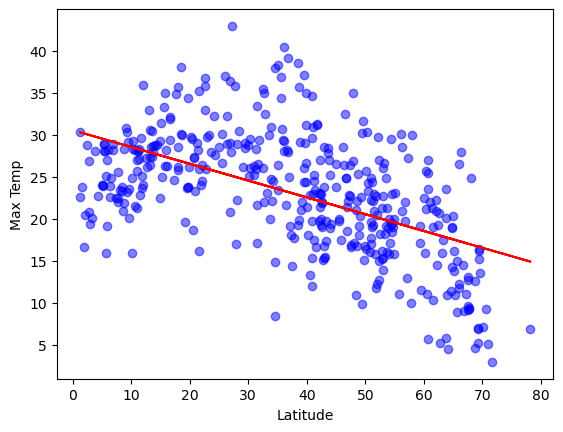

In [18]:
# Linear regression on Northern Hemisphere

(slope_temp, intercept_temp, rvalue_temp, pvalue_temp, stderr_temp) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_values_temp = northern_hemi_df['Lat'] * slope_temp + intercept_temp
line_eq_temp = "y = " + str(round(slope_temp,2)) + "x + " + str(round(intercept_temp,2))
print(f"The r-value is: {rvalue_temp}")
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], facecolors="blue",
            alpha=0.5)
plt.plot(northern_hemi_df['Lat'],regress_values_temp,"r-")
plt.annotate(line_eq_temp,(0,280),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.8066655162747391


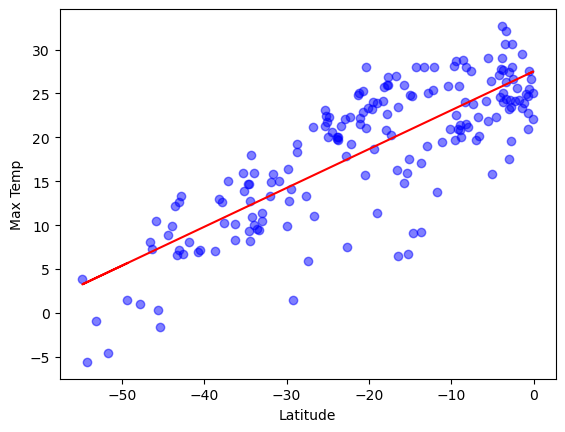

In [19]:
# Linear regression on Southern Hemisphere

(slope_temp, intercept_temp, rvalue_temp, pvalue_temp, stderr_temp) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
regress_values_temp = southern_hemi_df['Lat'] * slope_temp + intercept_temp
line_eq_temp = "y = " + str(round(slope_temp,2)) + "x + " + str(round(intercept_temp,2))
print(f"The r-value is: {rvalue_temp}")
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], facecolors="blue",
            alpha=0.5)
plt.plot(southern_hemi_df['Lat'],regress_values_temp,"r-")
plt.annotate(line_eq_temp,(0,280),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [50]:
"Discussion about the linear relationship \
By looking between the two graph, the difference is that for the southern hemisphere increases as the latitude increase \
However, for the northern hemisphere, there is a large disruption with the r-value supporting it \
Therefore, the higher temperature tends to lean towards high latitude which is in the northern hemisphere"

'Discussion about the linear relationship By looking between the two graph, the difference is that for the southern hemisphere increases as the latitude increase However, for the northern hemisphere, there is a large disruption with the r-value supporting it Therefore, the higher temperature tends to lean towards high latitude which is in the northern hemisphere'

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.15829354608279617


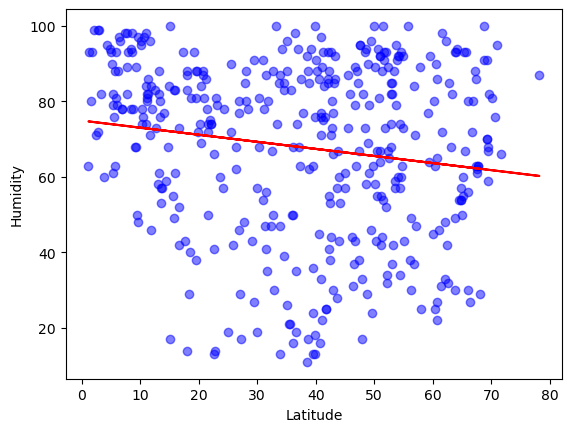

In [20]:
# Northern Hemisphere
(slope_humid, intercept_humid, rvalue_humid, pvalue_humid, stderr_humid) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regress_values_humid = northern_hemi_df['Lat'] * slope_humid + intercept_humid
line_eq_humid = "y = " + str(round(slope_humid,2)) + "x + " + str(round(intercept_humid,2))

print(f"The r-value is: {rvalue_humid}")
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], facecolors="blue",
            alpha=0.5)
plt.plot(northern_hemi_df['Lat'],regress_values_humid,"r-")
plt.annotate(line_eq_humid,(0,280),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: -0.05402498817212236


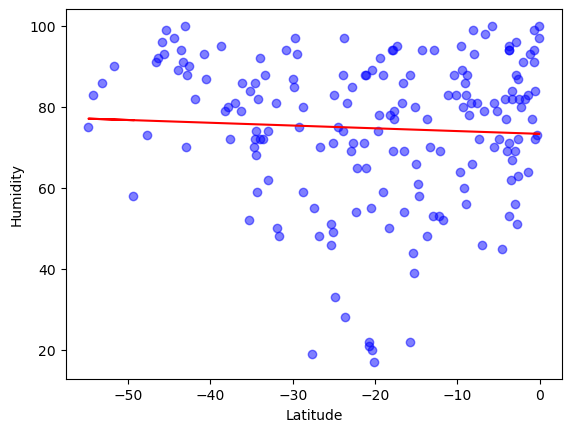

In [21]:
# Southern Hemisphere
(slope_humid, intercept_humid, rvalue_humid, pvalue_humid, stderr_humid) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regress_values_humid = southern_hemi_df['Lat'] * slope_humid + intercept_humid
line_eq_humid = "y = " + str(round(slope_humid,2)) + "x + " + str(round(intercept_humid,2))

print(f"The r-value is: {rvalue_humid}")
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], facecolors="blue",
            alpha=0.5)
plt.plot(southern_hemi_df['Lat'],regress_values_humid,"r-")
plt.annotate(line_eq_humid,(0,280),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [65]:
"By comparing the two hemisphere, the regression value are both familiar in which it close to 0 \
This means that the relation between Latitude and Humidity are independent so there isn't any correlation for Latitude \
having an impact to the Humidity"

"By comparing the two hemisphere, the regression value are both familiar in which it close to 0 This means that the relation between Latitude and Humidity are independent so there isn't any correlation for Latitude having an impact to the Humidity"

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.124334241238999


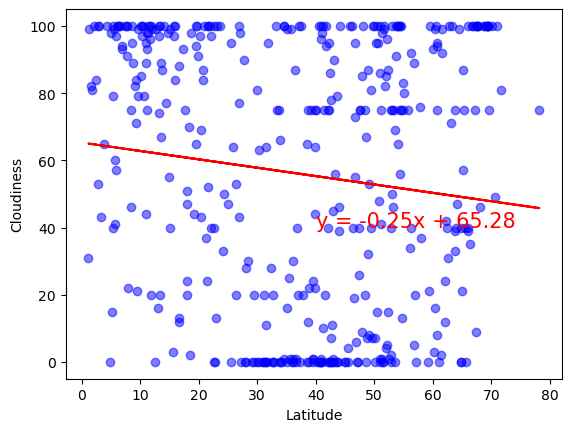

In [22]:
# Northern Hemisphere
(slope_cloud, intercept_cloud, rvalue_cloud, pvalue_cloud, stderr_cloud) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regress_values_cloud = northern_hemi_df['Lat'] * slope_cloud + intercept_cloud
line_eq_cloud = "y = " + str(round(slope_cloud,2)) + "x + " + str(round(intercept_cloud,2))

print(f"The r-value is: {rvalue_cloud}")
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], facecolors="blue",
            alpha=0.5)
plt.plot(northern_hemi_df['Lat'],regress_values_cloud,"r-")
plt.annotate(line_eq_cloud,(40,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: -0.1756106250679207


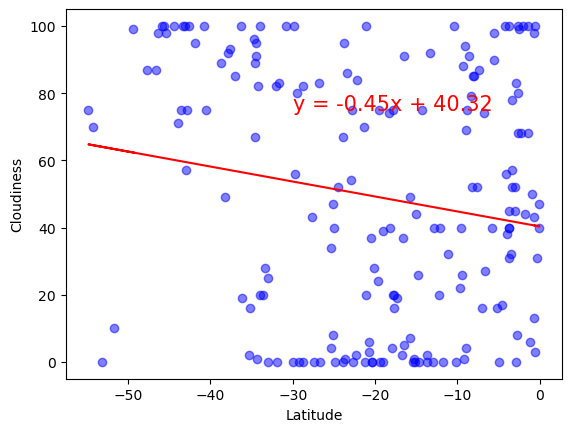

In [23]:
# Southern Hemisphere
(slope_cloud, intercept_cloud, rvalue_cloud, pvalue_cloud, stderr_cloud) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regress_values_cloud = southern_hemi_df['Lat'] * slope_cloud + intercept_cloud
line_eq_cloud = "y = " + str(round(slope_cloud,2)) + "x + " + str(round(intercept_cloud,2))

print(f"The r-value is: {rvalue_cloud}")
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], facecolors="blue",
            alpha=0.5)
plt.plot(southern_hemi_df['Lat'],regress_values_cloud,"r-")
plt.annotate(line_eq_cloud,(-30,75),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [78]:
"Based on looking into the two graph, both scatterplot shows wide range in cloudiness which the r-value support it \
The possible assumption is that cloudiness is extremely random. Hence there isn't many points that aligns to the linear line"

"Based on looking into the two graph, both scatterplot shows wide range in cloudiness which the r-value support it The possible assumption is that cloudiness is extremely random. Hence there isn't many points that aligns to the linear line"

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.10613613241820785


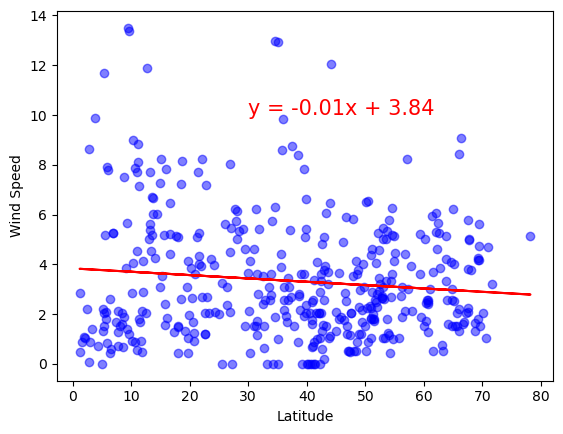

In [24]:
# Northern Hemisphere
(slope_wind, intercept_wind, rvalue_wind, pvalue_wind, stderr_wind) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regress_values_wind = northern_hemi_df['Lat'] * slope_wind + intercept_wind
line_eq_wind = "y = " + str(round(slope_wind,2)) + "x + " + str(round(intercept_wind,2))

print(f"The r-value is: {rvalue_wind}")
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], facecolors="blue",
            alpha=0.5)
plt.plot(northern_hemi_df['Lat'],regress_values_wind,"r-")
plt.annotate(line_eq_wind,(30,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.18245881787117502


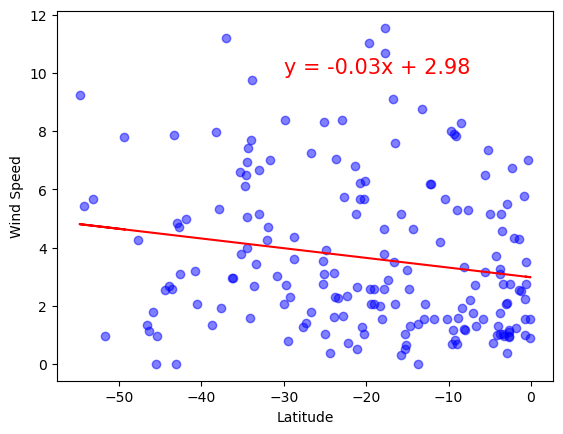

In [25]:
# Southern Hemisphere
(slope_wind, intercept_wind, rvalue_wind, pvalue_wind, stderr_wind) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regress_values_wind = southern_hemi_df['Lat'] * slope_wind + intercept_wind
line_eq_wind = "y = " + str(round(slope_wind,2)) + "x + " + str(round(intercept_wind,2))

print(f"The r-value is: {rvalue_wind}")
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], facecolors="blue",
            alpha=0.5)
plt.plot(southern_hemi_df['Lat'],regress_values_wind,"r-")
plt.annotate(line_eq_wind,(-30,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [79]:
"For the northen hemisphere, the m value in the equation is relatively flat of 0.01 which means that as the latitude \
increase, the increase in wind speed is minimal the numerous points within the latitude range highlights how even the wind \
speed is distributed. For the southern hemisphere, there is a certain dense section where higher latitude between -30 and 0 has \
lower wind speed relatively close and similar to the wind speed in the northern hemisphere."

'For the northen hemisphere, the m value in the equation is relatively flat of 0.01 which means that as the latitude increase, the increase in wind speed is minimal the numerous points within the latitude range highlights how even the wind speed is distributed. For the southern hemisphere, there is a certain dense section where higher latitude between -30 and 0 has lower wind speed relatively close and similar to the wind speed in the northern hemisphere.'